In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import probfit
import iminuit
from scipy.stats import norm

from probfit import UnbinnedLH
from probfit import gaussian
from iminuit import Minuit



In [2]:
original_df=pd.read_hdf("/mnt/t3nfs01/data01/shome/micheli/energyRegProject_20180223/CMSSW_8_0_4/src/RegressionTraining/applyRegression/ntuples_NN/Ntup_10Nov_Photon_testing.hd5")
#original_df_EE=pd.read_hdf("/mnt/t3nfs01/data01/shome/micheli/energyRegProject_20180223/CMSSW_8_0_4/src/RegressionTraining/applyRegression/ntuples_NN_EE/Ntup_10Nov_Photon_testing_EE.hd5")
print("finished")

Opening /mnt/t3nfs01/data01/shome/micheli/energyRegProject_20180223/CMSSW_8_0_4/src/RegressionTraining/applyRegression/ntuples_NN/Ntup_10Nov_Photon_testing.hd5 in read-only mode
finished


In [81]:
column='pt'
lower_bound=0.8
upper_bound=1.2

df=original_df.copy()
df=df[df['response']>lower_bound]
df=df[df['response']<upper_bound]
df.loc[:,'response']=np.reciprocal(df.loc[:,'response'].values) #invert response
df=df[np.abs(df[column]-df[column].median()) <= (2*df[column].std())]#outlier detection

In [82]:
x_plot=[]
y_plot=[]
y_err=[]
y_err_fit=[]
y_err_sigma=[]
notused,bins=pd.cut(df[column],30,retbins=True)#todo: Add errors in histogramm and ratio sqrt(entries)

In [109]:
def gauss(data,xmin,xmax,mu ,std):

# Plot the PDF.
    plt.hist(data,bins=100,normed=1)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()


(0.9934019006524398, 0.007452988892439811)


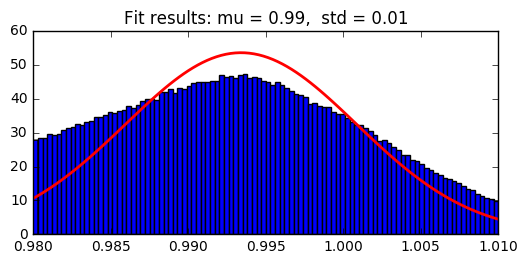

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: LogWarning: x is really small return 0


FCN = 71085.8314122 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 3.7101555231e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,alpha,0.533878,0.000675518,,,0.3,0.9,No
1,n,3,0.1,,,,,Yes
2,mean,0.993402,0.01,,,0.9,1.05,Yes
3,sigma,0.00745299,1,,,0.001,0.091,Yes


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: InitialParamWarning: Parameter alpha is floating but does not have initial step size. Assume 1.
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: InitialParamWarning: Parameter n is floating but does not have initial step size. Assume 1.
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: LogWarning: x is really small return 0
Exception ZeroDivisionError: 'float division' in 'probfit._libstat.xlogyx' ignored
Exception ZeroDivisionError: 'float division' in 'probfit._libstat.xlogyx' ignored
Exception ZeroDivisionError: 'float division' in 'probfit._libstat.xlogyx' ignored
Exception ZeroDivisionError: 'float division' in 'probfit._libsta

FCN = 38300.4828811 
 TOTAL NCALL = 193 
 NCALLS = 193 
 
 
 EDM = 1.57067838857e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,alpha,0.302965,0.000823361,,,,,No
1,n,20.4217,0.584895,,,,,No
2,mean,0.996854,1.5758e-05,,,,,No
3,sigma,0.00745299,1,,,,,Yes


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: InitialParamWarning: Parameter alpha is floating but does not have initial step size. Assume 1.
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: LogWarning: x is really small return 0
Exception ZeroDivisionError: 'float division' in 'probfit._libstat.xlogyx' ignored
Exception ZeroDivisionError: 'float division' in 'probfit._libstat.xlogyx' ignored
Exception ZeroDivisionError: 'float division' in 'probfit._libstat.xlogyx' ignored


FCN = 38300.4828811 
 TOTAL NCALL = 35 
 NCALLS = 35 
 
 
 EDM = 9.00772525298e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,alpha,0.302965,0.000356905,,,,,No
1,n,20.4217,1,,,,,Yes
2,mean,0.996854,1.45429e-05,,,,,No
3,sigma,0.00745299,1,,,,,Yes


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.


errorp:[ 19.02629759  18.68154169  19.20937271  20.0748599   19.18332609
  20.5669638   21.07130751  21.65640783  20.78460969  21.54065923
  21.51743479  24.0208243   24.0208243   23.28089345  23.64318084
  24.39262184  24.51530134  25.88435821  26.32489316  26.70205985
  26.66458325  28.24889378  28.72281323  28.74021573  30.49590136
  30.43024811  31.81194744  31.93743885  33.2565783   33.85262176
  34.          35.0142828   35.94440151  36.57868232  38.71692137
  38.4317577   40.70626487  41.43669871  43.4281015   43.87482194
  45.77116997  46.95742753  48.61069841  50.44799302  53.1130869
  53.80520421  54.92722458  57.87918451  60.56401572  61.18006211
  64.68384652  66.96267617  69.69218034  72.05553414  73.85797181
  78.8289287   79.59271323  83.24061509  85.56868586  88.92131353
  91.91300234  95.6765384  101.05938848 104.01922899 108.75201148
 111.37773566 116.06032914 120.73110618 124.64349161 129.34450124
 133.13902508 138.90284374 144.61673485 150.67514725 157.34357311
 164

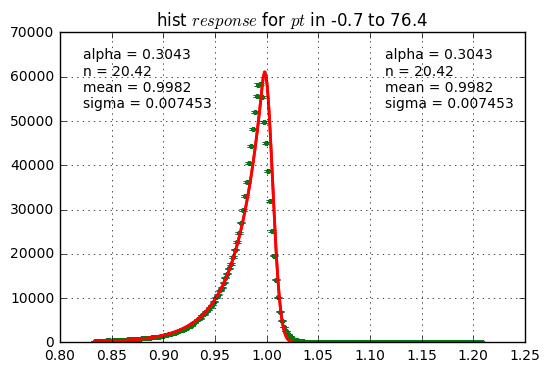

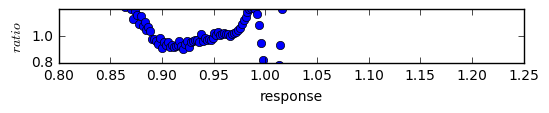

In [114]:
#for original_df in [original_df1,original_df_EE]:

    #if k==0:
      #  suffix='NN'
        #k+=1
   # else:
     #   suffix='NN_EE'
    

fit_upper=1.1
fit_lower=0.9
for i in xrange(0,len(bins)-1):
        df_temp=df[df[column] >=bins[i]]
        df_temp=df_temp[df_temp[column]<=bins[i+1]]
        bound = (fit_lower, fit_upper)
        bound_fit=(0.98,1.01)
            
        ax=plt.subplot2grid((6,3),(0,0), rowspan=4,colspan=4)    
        data=df_temp.loc[:,'response'].astype(float).values
        data_gaussian=df_temp[(df_temp['response']>bound_fit[0] )&
                              (df_temp['response']<bound_fit[1])].loc[:,'response'].astype(float).values
        mu,sigma=norm.fit(data_gaussian)
        print(mu,sigma)
        gauss(data_gaussian,np.min(data_gaussian),np.max(data_gaussian),mu, sigma)
        normalized_crystalball = probfit.Normalized(probfit.crystalball, bound)
        binned_likelihood = probfit.BinnedLH(normalized_crystalball, data,bins=200)
        
        
        
         
        minuit = iminuit.Minuit(binned_likelihood, alpha=.5, error_alpha=0.05,
                                limit_alpha=(0.3,0.9),n=3.,error_n=0.1, mean=mu,error_mean=0.01,
                                limit_mean=(0.9,1.05),  sigma=sigma, fix_sigma=True,fix_mean=True,fix_n=True,limit_sigma=(0.001,0.091))
        minuit.migrad()
        
        coeff=minuit.args
        minuit = iminuit.Minuit(binned_likelihood,alpha=coeff[0],n=coeff[1],mean=coeff[2],sigma=coeff[3]
                                ,fix_sigma=True)
        minuit.migrad()         
        coeff=minuit.args
        
        
        minuit = iminuit.Minuit(binned_likelihood,alpha=coeff[0],n=coeff[1],mean=coeff[2],sigma=coeff[3],
                                fix_sigma=True,fix_n=True,)
        minuit.migrad() 
        coeff=minuit.args
        
        minuit = iminuit.Minuit(binned_likelihood,alpha=coeff[0],n=coeff[1],mean=coeff[2],sigma=coeff[3],
                               fix_sigma=True,fix_n=True,fix_alpha=True)


        




        plt.title("hist $response$ for ${}$ in {} to {}".format(column,int(10*bins[i])/10.,int(10*bins[i+1])/10.))
        
        (data_edges, datay), (errorp, errorm), (total_pdf_x, total_pdf_y),parts=binned_likelihood.draw(
        parmloc=((0.7,0.95)),nfbins=201)
        print("errorp:{}".format(errorp))
        print("errorm:{}".format(errorm))
        binned_likelihood.show()
        coeff=minuit.args
        y_plot.append(coeff[2])
        x_plot.append(df_temp[column].values[np.argmin(df_temp['response'].values-coeff[2])])
        y_err_fit.append(minuit.errors[2])
        y_err_sigma.append(coeff[3])
        

        plt.subplot2grid((5,3),(4,0),rowspan=2,colspan=4).set_yticks([0.8,1])
        ratio=datay/total_pdf_y
        plt.ylim(0.8,1.2)
        plt.plot((data_edges[1:]+data_edges[:-1])/2,ratio,'bo')
        #unbinned_likelihood.draw_residual(minuit,parmloc=(0.7,0.95))
        plt.ylabel(r"$ratio$")
        plt.xlabel("response")
        

        #plt.savefig("plots/CB_{}/{}_{}".format(column,suffix,i)) 
        plt.show()
        break


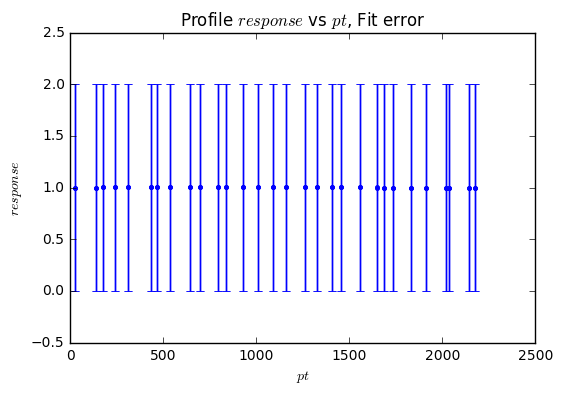

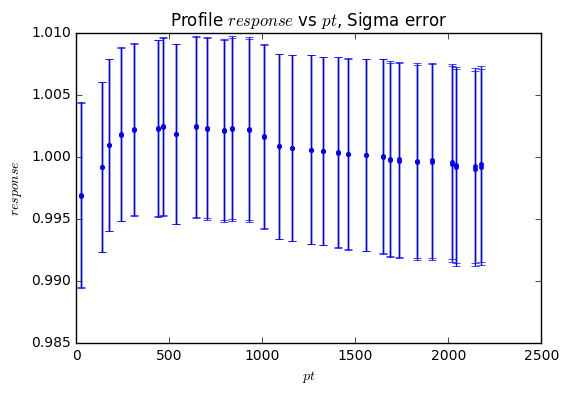

In [92]:
suffix='NN'
plt.figure()
plt.title("Profile $response$ vs ${}$, Fit error".format(column))
plt.ylabel(r"$response$")
plt.xlabel(r"${}$".format(column))
plt.errorbar(x_plot,y_plot,y_err_fit,fmt='b.')
plt.savefig("plots/profile_plots_response/Fit_Error_{}response_vs_{}".format(suffix,column))
plt.show()
plt.close()
plt.figure()
plt.title("Profile $response$ vs ${}$, Sigma error".format(column))
plt.ylabel(r"$response$")
plt.xlabel(r"${}$".format(column))
plt.errorbar(x_plot,y_plot,y_err_sigma,fmt='b.')
plt.savefig("plots/profile_plots_response/Sigma_Error_{}response_vs_{}".format(suffix,column))
plt.show()
plt.close()